# Regresión lineal de consumo de combustible de una ciudad respecto a sus emisiones de CO2
María Fernanda Torres Alcubilla A01285041

# Librerías

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# *Dataset*

La base de datos se obtuvo del reto de Kaggle: [CO2 Emissions](https://www.kaggle.com/datasets/bhuviranga/co2-emissions)

En esta se tienen diversos atributos pero debido al comportamiento de los datos, se decidió trabajar solamente con el consumo de combustible en una ciudad y sus emisiones de CO2.

In [26]:
df = pd.DataFrame(pd.read_csv('CO2 Emissions.csv'))[['Fuel Consumption City (L/100 km)','CO2 Emissions(g/km)']]

En el comportamiento de los datos, podemos observar que la gran mayoría sigue el mismo comportamiento lineal, sin embargo, se tienen varios datos por encima de este, los cuales también parecen seguir un comportamiento lineal. Se conservarán estos datos a pesar del ruido que podría ocasionar en las predicciones, ya que pueden ser útiles para obtener valores más acertado a cualquiera de las dos separaciones.

[Text(0.5, 1.0, 'Valores originales')]

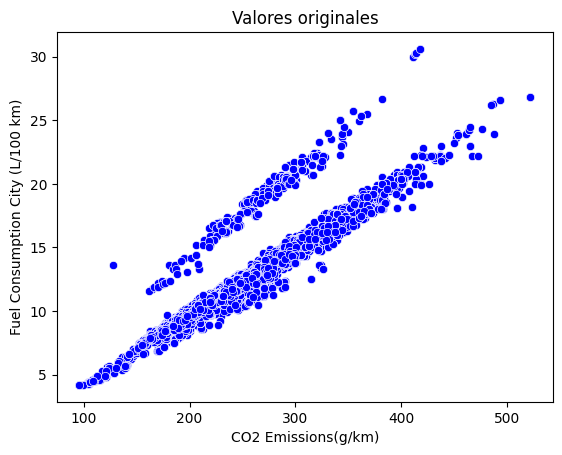

In [102]:
sns.scatterplot(x= df['CO2 Emissions(g/km)'], y=df['Fuel Consumption City (L/100 km)'], color='blue', marker='o').set(title='Valores originales')

## *Sets*

Para realizar la evaluación del modelo se separan los datos, 75% en datos de entrenamiento y 25% en prueba.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df['CO2 Emissions(g/km)'], df['Fuel Consumption City (L/100 km)'])

La siguiente gráfica representa la distribución de los datos de entrenamiento y prueba, como podemos observar ambos están repartidos en todo el eje x.

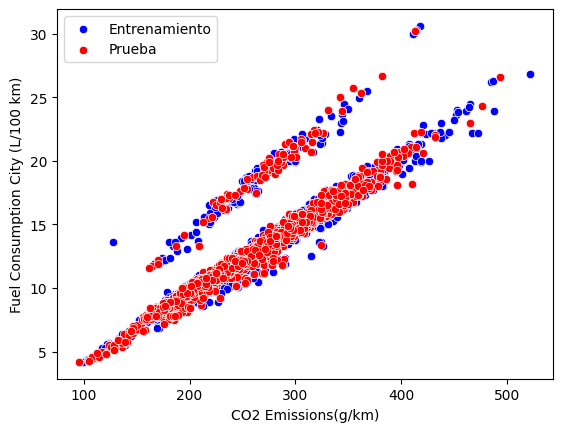

In [104]:
sns.scatterplot(x=X_train, y=y_train, color='blue', marker='o')
sns.scatterplot(x=X_test, y=y_test, color='red', marker='o')
plt.legend(labels=['Entrenamiento','Prueba'])

# *Funciones*

In [105]:
# Función lambda para la función de hipótesis
h = lambda x,t: t[0] + t[1]*x

In [106]:
# Función que retorna el valor de los thetas por cada iteración
## iter: iteraciones totales
## e1: variable independiente
## e2: variable dependiente
## t: arreglo de thetas iniciales
## a: alfa

def grad(iter, e1,e2,t,a):
  # Calcular el total de muestras a partir de los datos (n)
  n = len(e1)

  e1 = np.array(e1)
  e2 = np.array(e2)

  # Array con el historial de las thetas
  t_arr = []

  # Repetir ciertas iteraciones
  for i in range(iter):
    # Valores de thetas cambiantes
    t0 = []
    t1 = []
    # Calcular delta para theta0 y para cada muestra
    for j in range(n): t0.append(h(e1[j], t) - e2[j])

    # Calcular delta para theta1 y para cada muestra
    for k in range(n): t1.append((h(e1[k], t) - e2[k])*e1[k])

    # Actualizar theta0 y theta1 con sum y promedios
    t = [t[0] - a*np.mean(t0), t[1] - a*np.mean(t1)]
    t_arr.append(t)

  return t_arr

# Implementación

In [107]:
# Thetas iniciales
t = [0.5,0.5]

# Se buscan las thetas para los datos de entrenamiento
alfa = 0.000001
iter = 80
t_arr = grad(iter,X_train,y_train,t,alfa)

# Separación de los valores de theta0 y theta1
xs = [x[0] for x in t_arr]
ys = [x[1] for x in t_arr]

## Thetas

Podemos observar que en ambas gráficas de los thetas estos alcanzan la convergencia alrededor de la iteración 60 ya que la pendiente de la curva disminuye drásticamente. Por lo que se optó no realizar más iteraciones y aplicar los thetas de la útlima iteración.

*Theta 0:* 0.498

*Theta 1:* 0.050

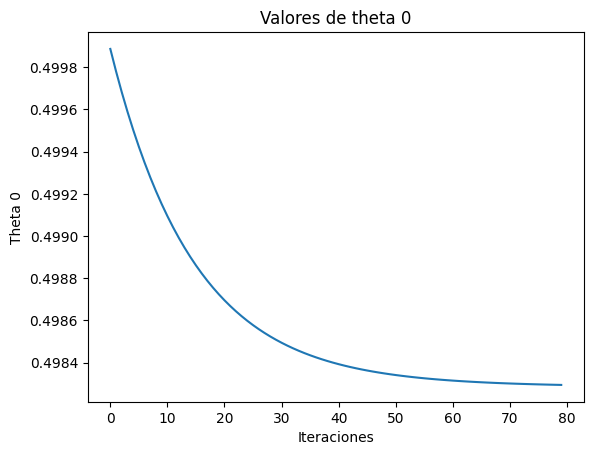

In [108]:
# Análisis Theta 0
plt.plot(xs)
plt.title('Valores de theta 0')
plt.xlabel('Iteraciones')
plt.ylabel('Theta 0')
plt.show()

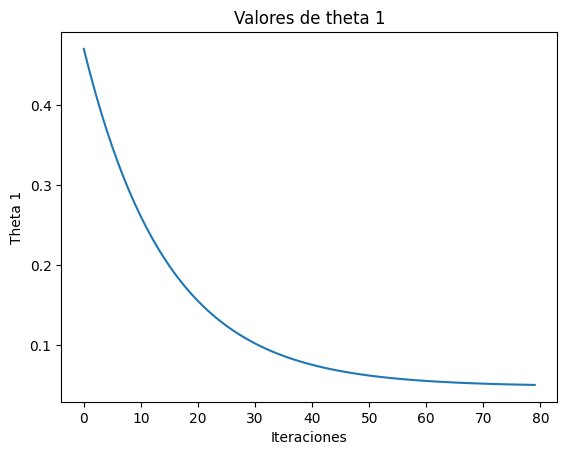

In [109]:
# Análisis Theta 1
plt.plot(ys)
plt.title('Valores de theta 1')
plt.xlabel('Iteraciones')
plt.ylabel('Theta 1')
plt.show()

In [110]:
# Thetas escogidos
t_arr[-1]

[0.49829413668251843, 0.05028455936452218]

# Predicciones

Las predicciones parecen tener el mismo comportamiento que la primera separación (la más baja), tomando valores que se acercan más al límite superior de esta. Esto se debe a que los datos de la separación de arriba ayudan a desplazar hacia esta pero no afectan tanto como para perder completamente el comportamiento de la primera separación.

In [73]:
# Fórmula de predicción con el último theta
pred = lambda t,x1: t[-1][0]+t[-1][1]*x1

# Estimaciones para el test set
y_pred = pred(t_arr,X_test)

Text(0.5, 1.0, 'Comparación de predicciones y datos reales')

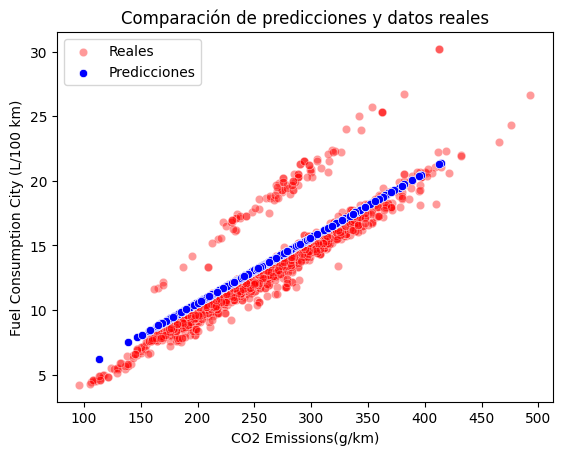

In [118]:
# Gráfica de datos reales y predicciones
sns.scatterplot(x=X_test, y=y_test, color='red', marker='o', alpha = 0.4)
sns.scatterplot(x=X_test, y=y_pred, color='blue', marker='o')
plt.legend(labels=['Reales','Predicciones'])
plt.title('Comparación de predicciones y datos reales')

# Evaluación

## Errores

Los siguientes dos errores se usan para el cálculo de R^2

In [126]:
# SSE - suma de cuadrados
SSE = ((y_test-y_pred)**2).sum()
SSE

1133.735352262794

In [127]:
# SST - suma de cuadrados totales
SST = ((y_test - y_test.mean())**2).sum()
SST

22384.21357877639

El RMSE representa la cantidad de error entre la predicción y observación.

En promedio se espera que las predicciones  estén alejadas 1.57 unidades del dato real.

In [134]:
# RMSE - Eror cuadrático medio
np.sqrt(((y_test-y_pred)**2).mean())

1.571627074309696

## R^2

Ya sea el coeficiente de determinación ordinario o ajustado, ambos valores son muy cercanos a 1 por lo que el modelo es confiable para futuras predicciones.

In [128]:
# R cuadrado ordinario
R_ord = 1 - (SSE/SST)
R_ord

0.9493511197848047

In [132]:
# R cuadrado ajustado por el número de coeficientes (p = 2)
n = y_test.shape[0]
R_adj = 1 - ((n-1)/(n-2))*(SSE/SST)
R_adj

0.9493236678172083